In [2]:
#Import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Load the dataset
titanic_df = pd.read_csv('Titanic-Dataset.csv')

In [4]:
#Explore the dataset
print(titanic_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
#Check the summary statistics
print(titanic_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [6]:
#Check the data types
print(titanic_df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [7]:
#Check for missing values
print(titanic_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


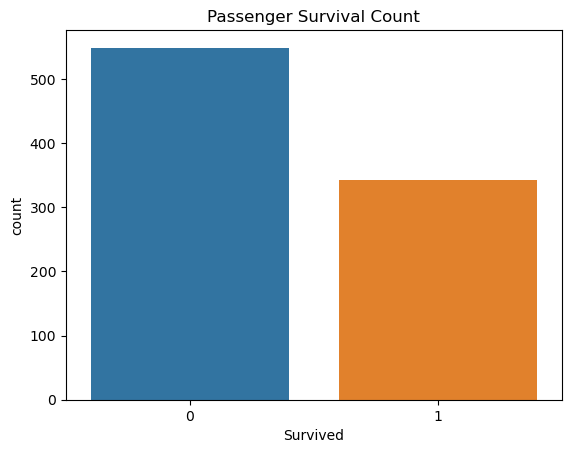

In [8]:
#Visualize the distribution of passengers by survival status
sns.countplot(x='Survived', data=titanic_df)
plt.title('Passenger Survival Count')
plt.show()

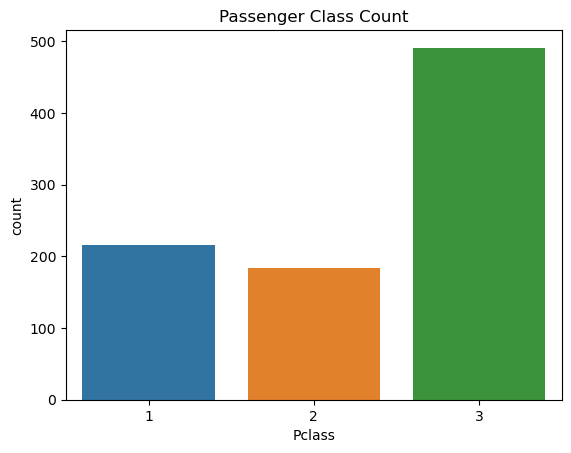

In [9]:
#Visualize the distribution of passengers by ticket class
sns.countplot(x='Pclass', data=titanic_df)
plt.title('Passenger Class Count')
plt.show()

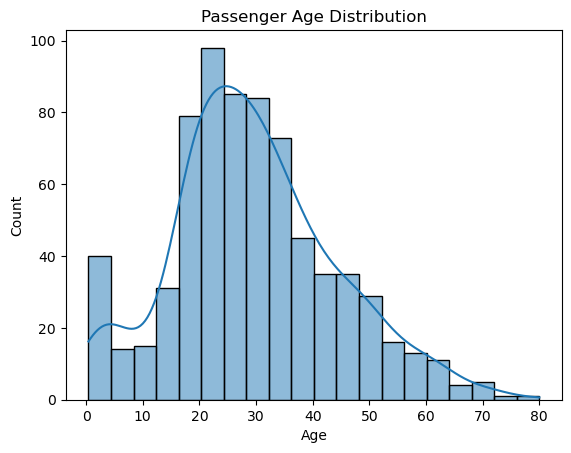

In [10]:
#Visualize the distribution of passengers' ages
sns.histplot(x='Age', data=titanic_df, kde=True)
plt.title('Passenger Age Distribution')
plt.show()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_16812\1359713230.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = titanic_df.corr()


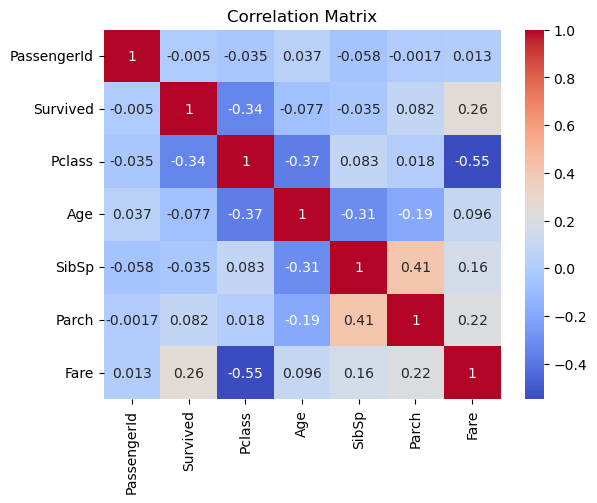

In [11]:
#Explore the correlation between numerical features
corr_matrix = titanic_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

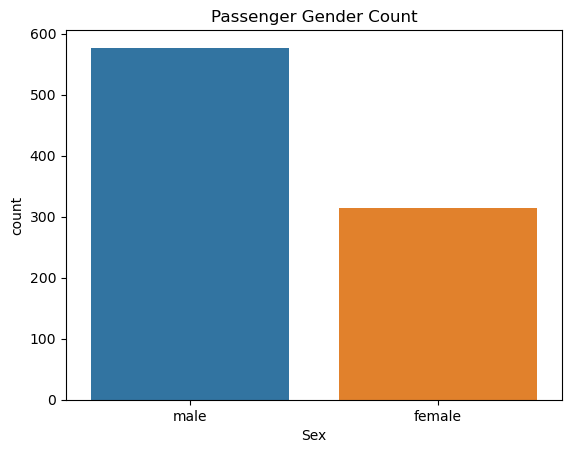

In [12]:
#Analyze categorical features
sns.countplot(x='Sex', data=titanic_df)
plt.title('Passenger Gender Count')
plt.show()

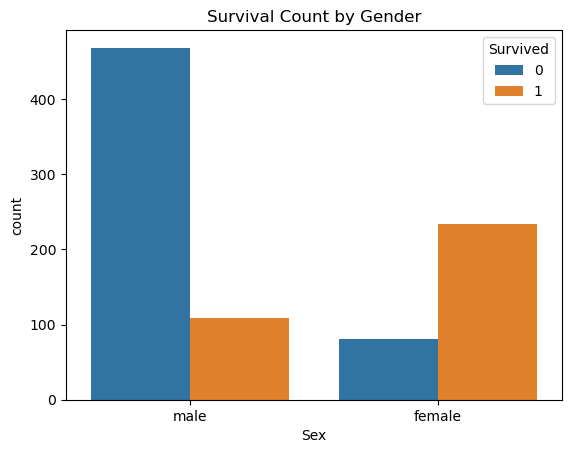

In [13]:
#Investigate relationships between categorical and survival status
sns.countplot(x='Sex', hue='Survived', data=titanic_df)
plt.title('Survival Count by Gender')
plt.show()

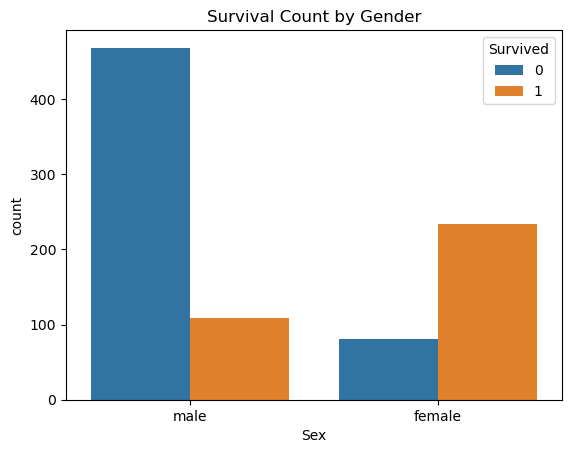

In [14]:
#Explore numerical features with respect to survival status
sns.countplot(x='Sex', hue='Survived', data=titanic_df)
plt.title('Survival Count by Gender')
plt.show()

In [15]:
#Handle missing values
#To drop rows with missing values
titanic_df.dropna(inplace=True)

In [16]:
#To drop columns with missing values
titanic_df.dropna(axis=1, inplace=True)

In [17]:
#To perform imputation and fill missing values
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

In [18]:
#Consider feature engineering
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']

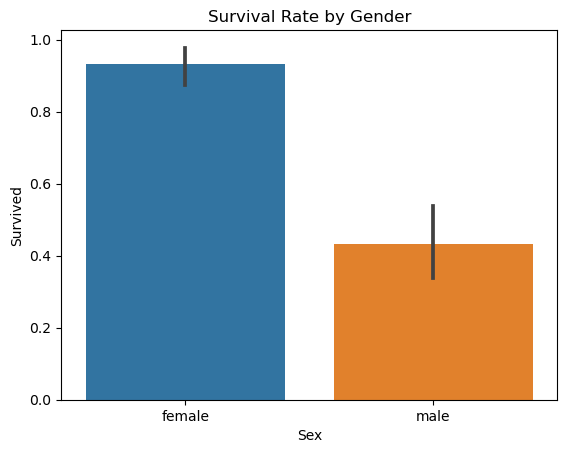

In [19]:
#Explore the survival rate based on different features using grouped bar plots
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.title('Survival Rate by Gender')
plt.show()

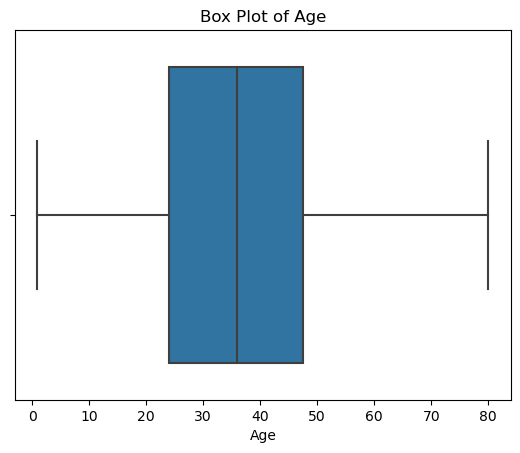

In [20]:
#Identify outliers
sns.boxplot(x='Age', data=titanic_df)
plt.title('Box Plot of Age')
plt.show()

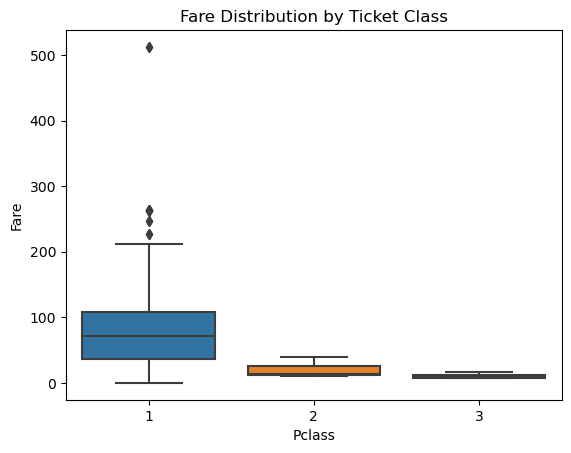

In [21]:
#Explore fare distribution by ticket class
sns.boxplot(x='Pclass', y='Fare', data=titanic_df)
plt.title('Fare Distribution by Ticket Class')
plt.show()

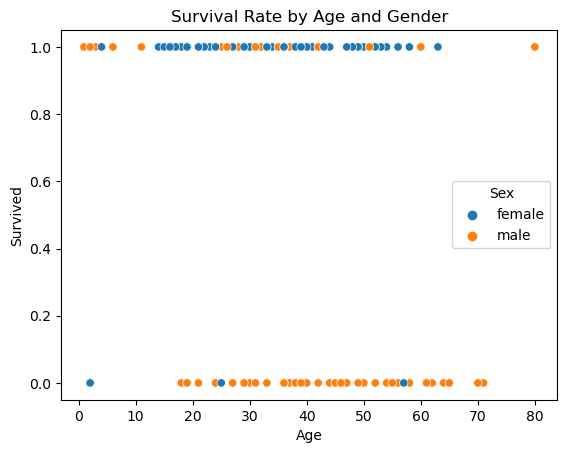

In [22]:
#Analyze survival rate by age and gender
sns.scatterplot(x='Age', y='Survived', hue='Sex', data=titanic_df)
plt.title('Survival Rate by Age and Gender')
plt.show()

In [24]:
#Consider feature interactions
titanic_df['FarePerPerson'] = titanic_df['Fare'] / (titanic_df['FamilySize'] + 1)

In [25]:
#Perform a chi-square test
from scipy.stats import chi2_contingency

# Perform chi-square test between survival status and gender
cross_tab = pd.crosstab(titanic_df['Survived'], titanic_df['Sex'])
chi2, p_value, _, _ = chi2_contingency(cross_tab)

print('Chi-square test result:')
print('Chi-square statistic:', chi2)
print('p-value:', p_value)

Chi-square test result:
Chi-square statistic: 49.62965365707783
p-value: 1.8568580662867508e-12


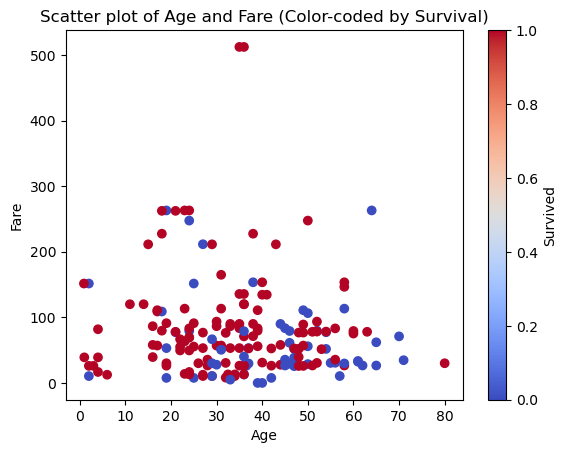

In [26]:
#Iterate and refine the analysis
plt.scatter(titanic_df['Age'], titanic_df['Fare'], c=titanic_df['Survived'], cmap='coolwarm')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter plot of Age and Fare (Color-coded by Survival)')
plt.colorbar(label='Survived')
plt.show()

In [30]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Prepare the data
X = titanic_df[['Pclass', 'Sex', 'Age', 'Fare']]
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to binary indicators
y = titanic_df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print('Logistic Regression Results:')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Confusion Matrix:\n', confusion_mat)

Logistic Regression Results:
Accuracy: 0.7297297297297297
Precision: 0.76
Recall: 0.8260869565217391
F1-score: 0.7916666666666667
Confusion Matrix:
 [[ 8  6]
 [ 4 19]]


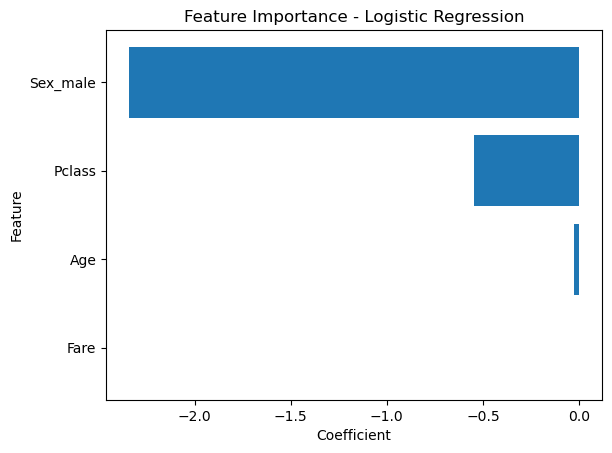

In [42]:
# Extract feature coefficients from the logistic regression model
coefficients = logreg_model.coef_[0]

# Create a DataFrame to display feature coefficients
feature_importance_logreg = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_importance_logreg = feature_importance_logreg.sort_values('Coefficient', ascending=False)

# Plot feature importance
plt.barh(feature_importance_logreg['Feature'], feature_importance_logreg['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance - Logistic Regression')
plt.show()

In [48]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for logistic regression
param_grid_logreg = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

# Perform grid search for logistic regression
grid_search_logreg = GridSearchCV(estimator=logreg_model, param_grid=param_grid_logreg, cv=5)
grid_search_logreg.fit(X_train, y_train)

# Get the best parameters and best score for logistic regression
best_params_logreg = grid_search_logreg.best_params_
best_score_logreg = grid_search_logreg.best_score_

print('Best Parameters - Logistic Regression:', best_params_logreg)
print('Best Score - Logistic Regression:', best_score_logreg)

Best Parameters - Logistic Regression: {'C': 1, 'penalty': 'l2'}
Best Score - Logistic Regression: 0.7402298850574712


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueErro

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


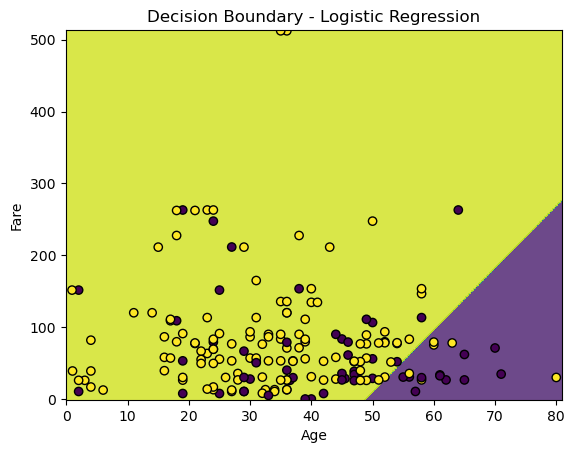

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Extract the two most important features
X_2d = X[['Age', 'Fare']]

# Fit the logistic regression model with the two features
logreg_2d = LogisticRegression()
logreg_2d.fit(X_2d, y)

# Create a meshgrid of points to plot the decision boundary
x_min, x_max = X_2d['Age'].min() - 1, X_2d['Age'].max() + 1
y_min, y_max = X_2d['Fare'].min() - 1, X_2d['Fare'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = logreg_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_2d['Age'], X_2d['Fare'], c=y, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Decision Boundary - Logistic Regression')
plt.show()

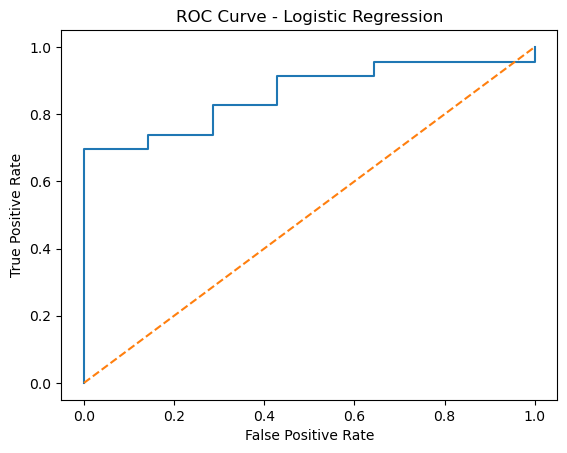

AUC Score - Logistic Regression: 0.860248447204969


In [36]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the probabilities for positive class
y_pred_prob = logreg_model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')  # Plot the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.show()

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print('AUC Score - Logistic Regression:', auc_score)

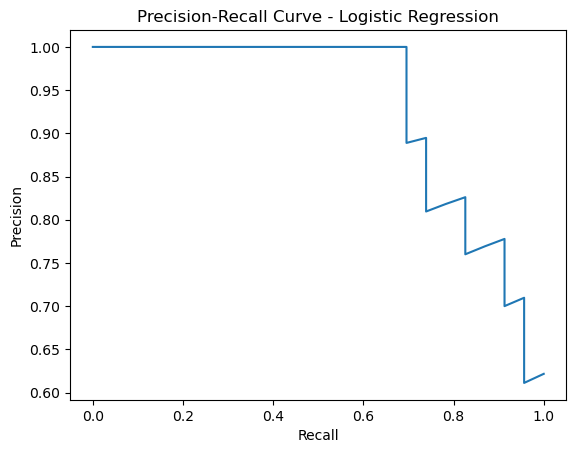

In [37]:
from sklearn.metrics import precision_recall_curve

# Calculate the probabilities for positive class
y_pred_prob = logreg_model.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot the Precision-Recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.show()

In [31]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create and train the random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print('Random Forest Results:')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Confusion Matrix:\n', confusion_mat)

Random Forest Results:
Accuracy: 0.7567567567567568
Precision: 0.7692307692307693
Recall: 0.8695652173913043
F1-score: 0.8163265306122449
Confusion Matrix:
 [[ 8  6]
 [ 3 20]]


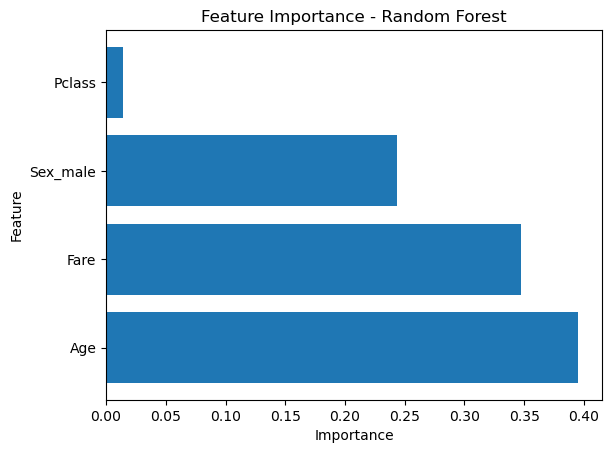

In [43]:
# Extract feature importances from the random forest model
importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_rf = feature_importance_rf.sort_values('Importance', ascending=False)

# Plot feature importance
plt.barh(feature_importance_rf['Feature'], feature_importance_rf['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Random Forest')
plt.show()

In [47]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for random forest
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]}

# Perform grid search for random forest
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best score for random forest
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print('Best Parameters - Random Forest:', best_params_rf)
print('Best Score - Random Forest:', best_score_rf)

Best Parameters - Random Forest: {'max_depth': 3, 'n_estimators': 200}
Best Score - Random Forest: 0.746896551724138


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


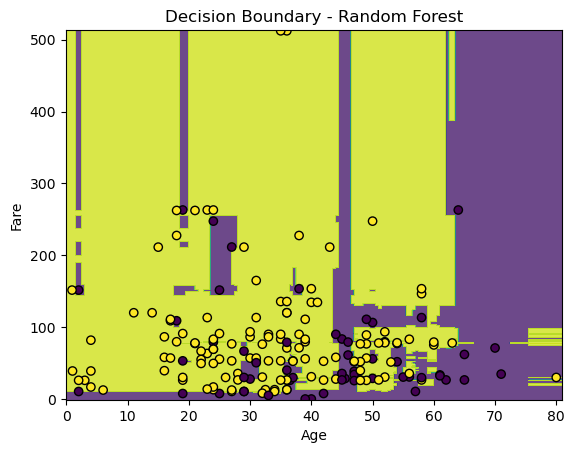

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Extract the two most important features
X_2d = X[['Age', 'Fare']]

# Fit the random forest model with the two features
rf_2d = RandomForestClassifier(n_estimators=100, random_state=42)
rf_2d.fit(X_2d, y)

# Create a meshgrid of points to plot the decision boundary
x_min, x_max = X_2d['Age'].min() - 1, X_2d['Age'].max() + 1
y_min, y_max = X_2d['Fare'].min() - 1, X_2d['Fare'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = rf_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_2d['Age'], X_2d['Fare'], c=y, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Decision Boundary - Random Forest')
plt.show()

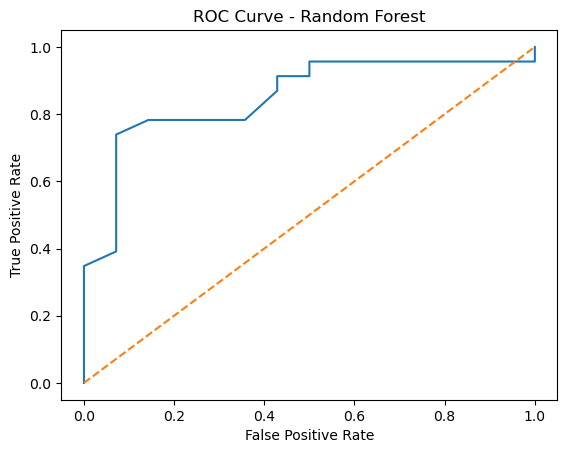

AUC Score - Random Forest: 0.8509316770186335


In [38]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the probabilities for positive class
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')  # Plot the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.show()

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print('AUC Score - Random Forest:', auc_score)

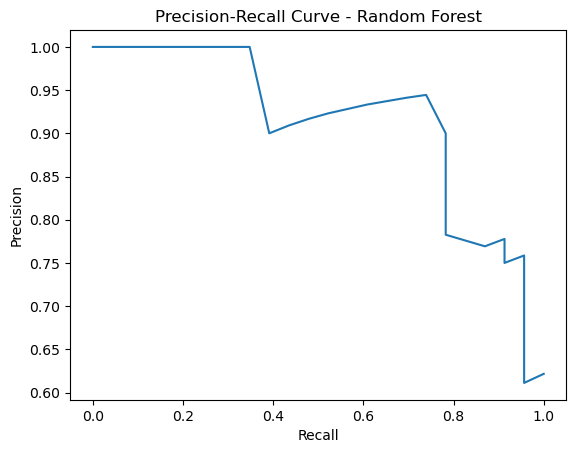

In [39]:
from sklearn.metrics import precision_recall_curve

# Calculate the probabilities for positive class
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot the Precision-Recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest')
plt.show()

In [34]:
#Support Vector Machines (SVM)
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = svm_model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print('SVM Results:')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Confusion Matrix:\n', confusion_mat)

SVM Results:
Accuracy: 0.7837837837837838
Precision: 0.8260869565217391
Recall: 0.8260869565217391
F1-score: 0.8260869565217391
Confusion Matrix:
 [[10  4]
 [ 4 19]]


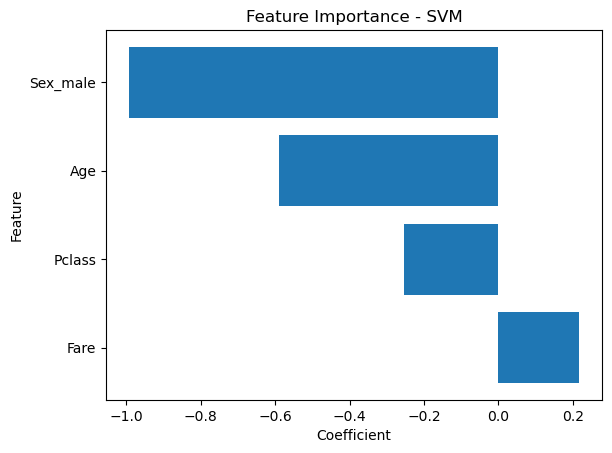

In [44]:
# Extract feature coefficients from the SVM model
coefficients = svm_model.coef_[0]

# Create a DataFrame to display feature coefficients
feature_importance_svm = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_importance_svm = feature_importance_svm.sort_values('Coefficient', ascending=False)

# Plot feature importance
plt.barh(feature_importance_svm['Feature'], feature_importance_svm['Coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance - SVM')
plt.show()

In [45]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for SVM
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Perform grid search for SVM
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5)
grid_search_svm.fit(X_train_scaled, y_train)

# Get the best parameters and best score for SVM
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

print('Best Parameters - SVM:', best_params_svm)
print('Best Score - SVM:', best_score_svm)

Best Parameters - SVM: {'C': 10, 'kernel': 'rbf'}
Best Score - SVM: 0.7333333333333333


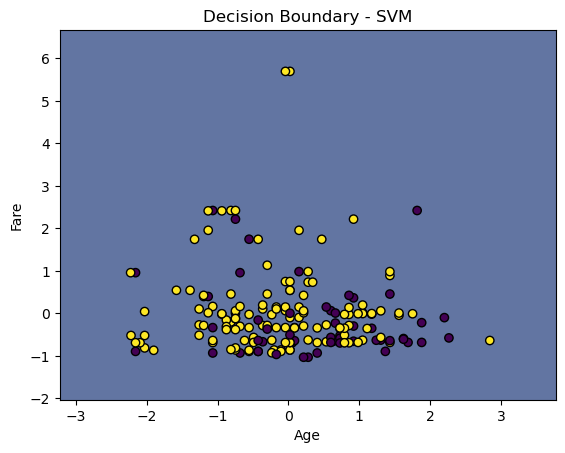

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Extract the two most important features
X_2d = X[['Age', 'Fare']]

# Scale the features
scaler = StandardScaler()
X_2d_scaled = scaler.fit_transform(X_2d)

# Fit the SVM model with the scaled features
svm_2d = SVC(kernel='linear', random_state=42)
svm_2d.fit(X_2d_scaled, y)

# Create a meshgrid of points to plot the decision boundary
x_min, x_max = X_2d_scaled[:, 0].min() - 1, X_2d_scaled[:, 0].max() + 1
y_min, y_max = X_2d_scaled[:, 1].min() - 1, X_2d_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_2d_scaled[:, 0], X_2d_scaled[:, 1], c=y, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Decision Boundary - SVM')
plt.show()

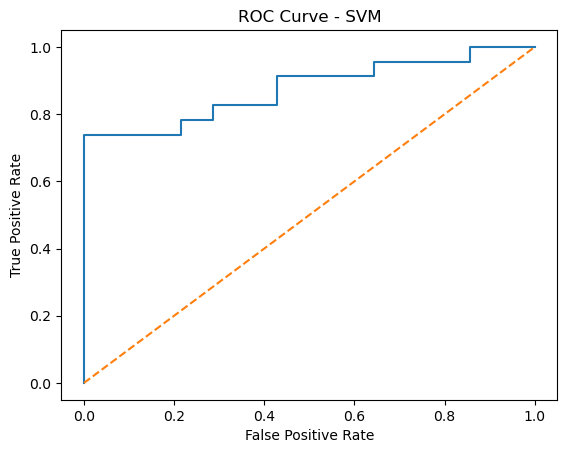

AUC Score - SVM: 0.875776397515528


In [40]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the decision function scores
y_scores = svm_model.decision_function(X_test_scaled)

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')  # Plot the diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.show()

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_scores)
print('AUC Score - SVM:', auc_score)

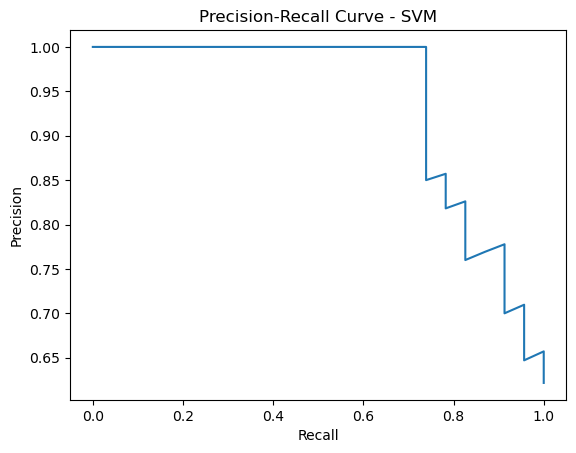

In [41]:
from sklearn.metrics import precision_recall_curve

# Calculate the decision function scores
y_scores = svm_model.decision_function(X_test_scaled)

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plot the Precision-Recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - SVM')
plt.show()

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform cross-validation
logreg_scores = cross_val_score(logreg_model, X, y, cv=5)
rf_scores = cross_val_score(rf_model, X, y, cv=5)
svm_scores = cross_val_score(svm_model, X_scaled, y, cv=5)

# Calculate mean scores
logreg_mean_score = logreg_scores.mean()
rf_mean_score = rf_scores.mean()
svm_mean_score = svm_scores.mean()

print('Mean Cross-Validation Scores:')
print('Logistic Regression:', logreg_mean_score)
print('Random Forest:', rf_mean_score)
print('SVM:', svm_mean_score)

Mean Cross-Validation Scores:
Logistic Regression: 0.7588588588588588
Random Forest: 0.7809309309309309
SVM: 0.759009009009009


In [57]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt

# Generate predictions for each model
logreg_predictions = logreg_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
svm_predictions = svm_model.predict(X_test_scaled)

# Generate classification report for each model
logreg_report = classification_report(y_test, logreg_predictions)
rf_report = classification_report(y_test, rf_predictions)
svm_report = classification_report(y_test, svm_predictions)

print('Classification Report - Logistic Regression:')
print(logreg_report)
print('Classification Report - Random Forest:')
print(rf_report)
print('Classification Report - SVM:')
print(svm_report)

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.67      0.57      0.62        14
           1       0.76      0.83      0.79        23

    accuracy                           0.73        37
   macro avg       0.71      0.70      0.70        37
weighted avg       0.72      0.73      0.72        37

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       0.73      0.57      0.64        14
           1       0.77      0.87      0.82        23

    accuracy                           0.76        37
   macro avg       0.75      0.72      0.73        37
weighted avg       0.75      0.76      0.75        37

Classification Report - SVM:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        14
           1       0.83      0.83      0.83        23

    accuracy                           0.78        37
   macro avg   

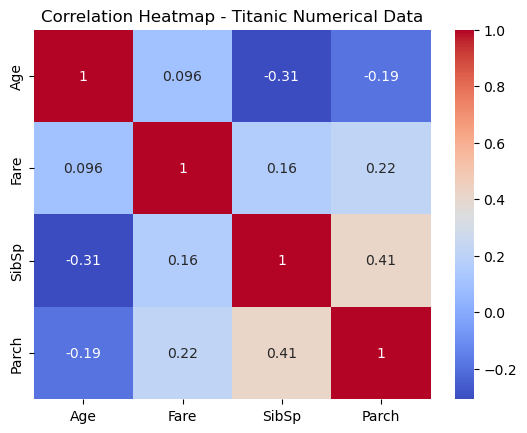

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic_data = pd.read_csv('Titanic-Dataset.csv')

# Select the numerical variables of interest
numerical_data = titanic_data[['Age', 'Fare', 'SibSp', 'Parch']]

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heat map
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Titanic Numerical Data')
plt.show()

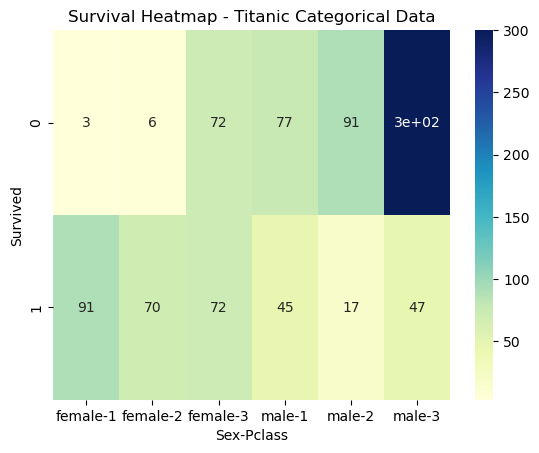

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic_data = pd.read_csv('Titanic-Dataset.csv')

# Select the categorical variables of interest
categorical_data = titanic_data[['Survived', 'Sex', 'Pclass', 'Embarked']]

# Create a contingency table
contingency_table = pd.crosstab(categorical_data['Survived'], [categorical_data['Sex'], categorical_data['Pclass']])

# Plot the heat map
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')
plt.title('Survival Heatmap - Titanic Categorical Data')
plt.show()